In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

# Carregar o dataset
data = pd.read_csv('Data/Google-Playstore.csv',nrows=5000) #data é um DataFrame

# Limitar o dataset a 500.000 linhas
#data = data.head(5000) #data = data.sample(n=500000, random_state=42) #para uma amostra aleatória #se for para as PRIMEIRAS 500 000 linhas: data = data.head(500000)


# Inspecionar os primeiros registros e verificar valores ausentes
print("Dados iniciais:")
print(data.head())
print(data.info())
print("Valores ausentes antes da imputação:")
print(data.isnull().sum())

# Remover linhas onde a variável alvo 'Installs' é nula
data = data.dropna(subset=['Installs'])

# Converter a coluna 'Installs' para um formato numérico (caso seja necessária)
#data['Installs'] = pd.to_numeric(data['Installs'], errors='coerce')
# data = data.dropna(subset=['Installs'])

# Ver alguns exemplos dos valores na coluna 'Installs' antes da conversão
print("Exemplos de valores na coluna 'Installs' antes da conversão:")
print(data['Installs'].head(10))



# Vamos tratar os dados de 'Installs' para que possamos utilizá-los como variável alvo
# Remover caracteres especiais
data['Installs'] = data['Installs'].str.replace('[+,]', '', regex=True) #retira os caracteres + e , e substitui por '', ou seja, retira

# Verificar se a conversão foi bem sucedida e converter para int
data['Installs'] = pd.to_numeric(data['Installs'], errors='coerce').astype('Int64')

# Verificar novamente alguns exemplos após a conversão
print("Exemplos de valores na coluna 'Installs' após a conversão:")
print(data['Installs'].head(10))

# Atualizar os valores ausentes após a remoção de linhas
print("Valores ausentes após remoção de linhas com 'Installs' nulos:")
print(data.isnull().sum())

# Preparação dos dados
# Suponha que a coluna 'Installs' é a variável alvo e as outras são features
X = data.drop(['Installs', 'App Name', 'App Id', 'Developer Website', 'Developer Email', 'Released',	'Last Updated', 'Content Rating',	'Privacy Policy', 'Scraped Time'], axis=1)
y = data['Installs']

# Verificar se ainda existem valores ausentes em y
print(f"Valores ausentes em y: {y.isnull().sum()}")


# Identificar variáveis numéricas e categóricas
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessamento
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputação de valores ausentes
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Imputação de valores ausentes
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Função para avaliar o modelo e retornar o pipeline treinado
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    '''
    As linhas dentro desta função relacionadas com o pipeline, criam e treinam um pipeline
    que aplica pré-processamento aos dados (`preprocessor`) e então ajusta o modelo (`model`).
    Verificam valores ausentes após a imputação, fazem previsões e avaliam o desempenho do modelo
    usando métricas de erro.
    '''
    # Verificar o tipo de 'y' antes do treinamento
    print(f"Tipo de 'y' (Installs) antes do treino: {y_train.dtype}")

    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])  # Aqui é onde o modelo é adicionado ao pipeline e o que o pipeline faz é aplicar o preprocessor e depois o modelo

    pipeline.fit(X_train, y_train)
    X_train_transformed = pipeline.named_steps['preprocessor'].transform(X_train)
    X_test_transformed = pipeline.named_steps['preprocessor'].transform(X_test)
    print(f"Valores ausentes após imputação (treino) para o modelo {name}:")
    print(pd.DataFrame(X_train_transformed).isnull().sum())
    y_pred = pipeline.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"Model: {name}")
    print(f"R^2: {r2:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}\n")
    return pipeline
#Imprimir tamanho do dataframe
print("Tamanho atual do dataframe:", data.shape)

Dados iniciais:
                                            App Name  \
0                                            Gakondo   
1                                Ampere Battery Info   
2                                             Vibook   
3  Smart City Trichy Public Service Vehicles 17UC...   
4                                            GROW.me   

                       App Id       Category  Rating  Rating Count Installs  \
0         com.ishakwe.gakondo      Adventure     0.0           0.0      10+   
1  com.webserveis.batteryinfo          Tools     4.4          64.0   5,000+   
2        com.doantiepvien.crm   Productivity     0.0           0.0      50+   
3     cst.stJoseph.ug17ucs548  Communication     5.0           5.0      10+   
4        com.horodyski.grower          Tools     0.0           0.0     100+   

   Minimum Installs  Maximum Installs  Free  Price  ...  \
0                10                15  True    0.0  ...   
1              5000              7662  True    0.0  ..

In [2]:
#Saber informações sobre o dataframe
print("data.info():", data.info())
#Ter o describe do dataset
print("data.describe():", data.describe())
#Qual o tipo de dados da coluna 'Installs'
print("Tipo de dados da coluna 'Installs':", data['Installs'].dtype)
#Imprimir tamanho do dataframe
print("Tamanho atual do dataframe:", data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   App Name           5000 non-null   object 
 1   App Id             5000 non-null   object 
 2   Category           5000 non-null   object 
 3   Rating             4952 non-null   float64
 4   Rating Count       4952 non-null   float64
 5   Installs           5000 non-null   Int64  
 6   Minimum Installs   5000 non-null   float64
 7   Maximum Installs   5000 non-null   int64  
 8   Free               5000 non-null   bool   
 9   Price              5000 non-null   float64
 10  Currency           5000 non-null   object 
 11  Size               5000 non-null   object 
 12  Minimum Android    4988 non-null   object 
 13  Developer Id       5000 non-null   object 
 14  Developer Website  3334 non-null   object 
 15  Developer Email    5000 non-null   object 
 16  Released           4852 

In [7]:
# Avaliar modelo e obter o pipeline treinado
pipeline = evaluate_model('Linear Regression', LinearRegression(), X_train, y_train, X_test, y_test)
#Imprimir tamanho do dataframe
print("Tamanho atual do dataframe:", data.shape)

print("Tamanho atual do dataframe 2:", data.shape)
#Saber informações sobre o dataframe
print("data.info():", data.info())
#Ter o describe do dataset
print("data.describe():", data.describe())
#Qual o tipo de dados da coluna 'Installs'
print("Tipo de dados da coluna 'Installs':", data['Installs'].dtype)
#Imprimir tamanho do dataframe
print("Tamanho atual do dataframe:", data.shape)


Tipo de 'y' (Installs) antes do treino: Int64
Valores ausentes após imputação (treino) para o modelo Linear Regression:
0    0
dtype: int64
Model: Linear Regression
R^2: 1.0000
MAE: 517.2016
MSE: 2785640.3466
RMSE: 1669.0238

Tamanho atual do dataframe: (5000, 24)
Tamanho atual do dataframe 2: (5000, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   App Name           5000 non-null   object 
 1   App Id             5000 non-null   object 
 2   Category           5000 non-null   object 
 3   Rating             4952 non-null   float64
 4   Rating Count       4952 non-null   float64
 5   Installs           5000 non-null   Int64  
 6   Minimum Installs   5000 non-null   int64  
 7   Maximum Installs   5000 non-null   int64  
 8   Free               5000 non-null   bool   
 9   Price              5000 non-null   float64
 10  Curren

In [4]:
# Carregar o ficheiro CSV da nova app
new_app_df = pd.read_csv('new_app.csv')  # Substitua 'path/to/' pelo caminho correto do seu ficheiro CSV

# Remover colunas não presentes nos dados de treino
new_app_df = new_app_df[X.columns]

# Função para prever a variável alvo para uma nova app
def predict_new_app(pipeline, new_app):
    # Preprocessar a nova app
    new_app_transformed = pipeline.named_steps['preprocessor'].transform(new_app)
    # Prever a variável alvo
    prediction = pipeline.named_steps['model'].predict(new_app_transformed)
    return prediction

# Fazer a previsão utilizando o pipeline treinado anteriormente
prediction = predict_new_app(pipeline, new_app_df)
print(f"Previsão de 'Installs' para a nova app 'Gakondo': {prediction[0]:.0f}")
#Imprimir tamanho do dataframe
print("Tamanho atual do dataframe:", data.shape)

Previsão de 'Installs' para a nova app 'Gakondo': -534
Tamanho atual do dataframe: (5000, 24)


In [5]:
# Avaliar modelo
pipeline = evaluate_model('Ridge Regression', Ridge(alpha=1.0), X_train, y_train, X_test, y_test)
#Imprimir tamanho do dataframe
print("Tamanho atual do dataframe:", data.shape)

Tipo de 'y' (Installs) antes do treino: Int64
Valores ausentes após imputação (treino) para o modelo Ridge Regression:
0    0
dtype: int64
Model: Ridge Regression
R^2: 1.0000
MAE: 1082.7328
MSE: 11441657.1709
RMSE: 3382.5519

Tamanho atual do dataframe: (5000, 24)


In [6]:
# Avaliar modelo
pipeline = evaluate_model('Lasso Regression', Lasso(alpha=1.0), X_train, y_train, X_test, y_test)
#Imprimir tamanho do dataframe
print("Tamanho atual do dataframe:", data.shape)

Tipo de 'y' (Installs) antes do treino: Int64
Valores ausentes após imputação (treino) para o modelo Lasso Regression:
0    0
dtype: int64
Model: Lasso Regression
R^2: 0.4550
MAE: 63180.3723
MSE: 234855266902.0385
RMSE: 484618.6820

Tamanho atual do dataframe: (5000, 24)


In [7]:
# Avaliar modelo
pipeline = evaluate_model('SVR (linear kernel)', SVR(kernel='linear'), X_train, y_train, X_test, y_test)
#Imprimir tamanho do dataframe
print("Tamanho atual do dataframe:", data.shape)

Tipo de 'y' (Installs) antes do treino: Int64
Valores ausentes após imputação (treino) para o modelo SVR (linear kernel):
0    0
dtype: int64
Model: SVR (linear kernel)
R^2: -0.0137
MAE: 78972.7660
MSE: 436800762155.5124
RMSE: 660909.0423

Tamanho atual do dataframe: (5000, 24)


In [8]:
# Avaliar modelo
pipeline = evaluate_model('SVR (rbf kernel)', SVR(kernel='rbf'), X_train, y_train, X_test, y_test)
#Imprimir tamanho do dataframe
print("Tamanho atual do dataframe:", data.shape)

Tipo de 'y' (Installs) antes do treino: Int64
Valores ausentes após imputação (treino) para o modelo SVR (rbf kernel):
0    0
dtype: int64
Model: SVR (rbf kernel)
R^2: -0.0144
MAE: 79127.1049
MSE: 437137413728.6768
RMSE: 661163.6815

Tamanho atual do dataframe: (5000, 24)


In [9]:
# Avaliar modelo
pipeline = evaluate_model('K-NN', KNeighborsRegressor(n_neighbors=5), X_train, y_train, X_test, y_test)
#Imprimir tamanho do dataframe
print("Tamanho atual do dataframe:", data.shape)

Tipo de 'y' (Installs) antes do treino: Int64
Valores ausentes após imputação (treino) para o modelo K-NN:
0    0
dtype: int64
Model: K-NN
R^2: 0.9477
MAE: 30489.6078
MSE: 22517209166.9264
RMSE: 150057.3529

Tamanho atual do dataframe: (5000, 24)


In [10]:
# Avaliar modelo
pipeline = evaluate_model('Decision Tree', DecisionTreeRegressor(), X_train, y_train, X_test, y_test)
#Imprimir tamanho do dataframe
print("Tamanho atual do dataframe:", data.shape)

Tipo de 'y' (Installs) antes do treino: Int64
Valores ausentes após imputação (treino) para o modelo Decision Tree:
0    0
dtype: int64
Model: Decision Tree
R^2: 0.9625
MAE: 4400.0000
MSE: 16160000000.0000
RMSE: 127121.9887

Tamanho atual do dataframe: (5000, 24)


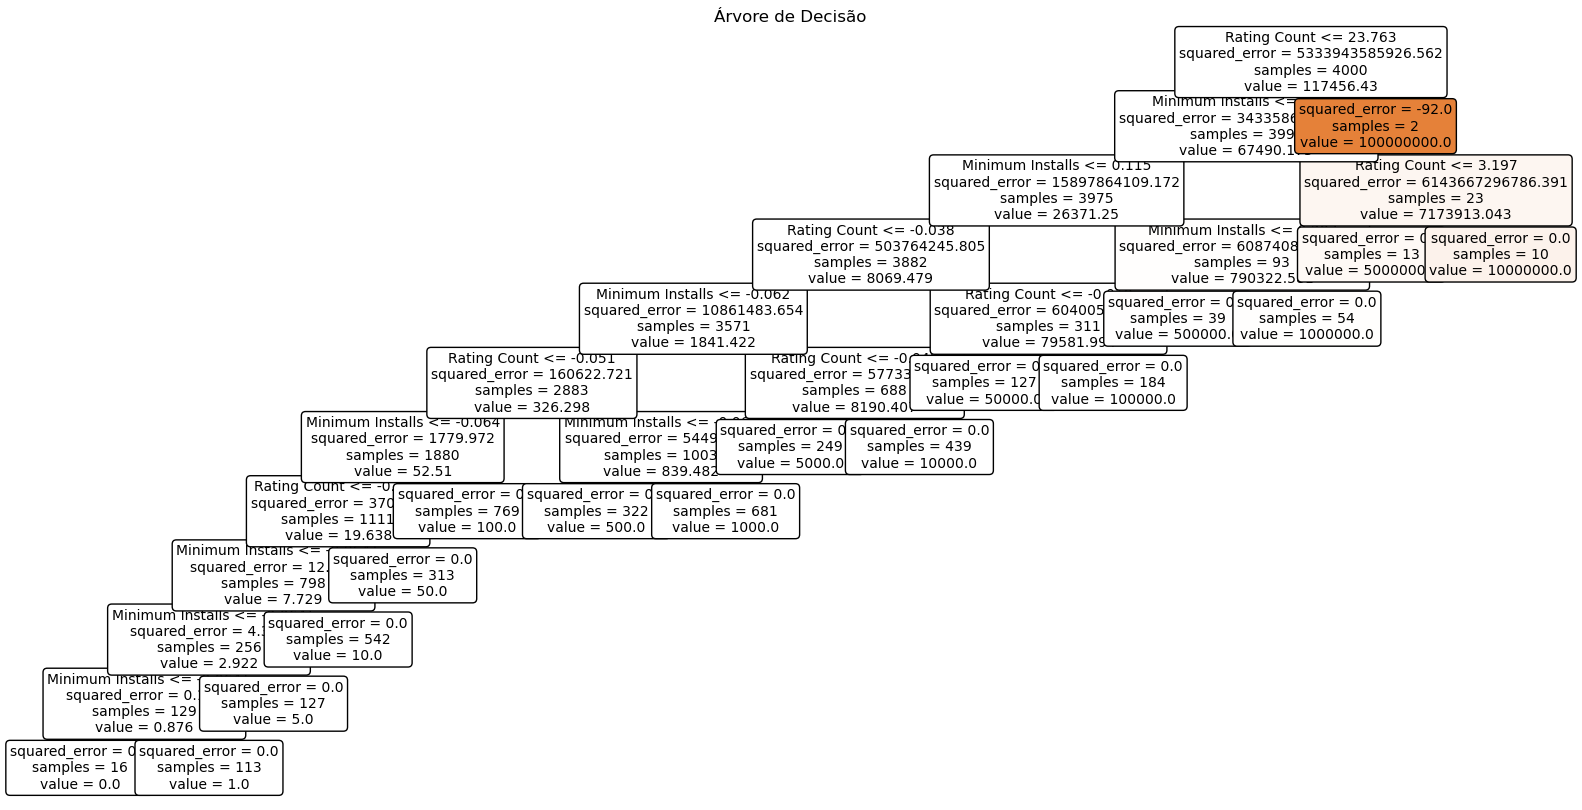

In [11]:
# Visualizar a árvore de decisão
# Importar funções para plotagem de árvores de decisão
from sklearn.tree import plot_tree

# Extrair o modelo treinado do pipeline
decision_tree_model = pipeline.named_steps['model']

# Plotar a árvore de decisão
plt.figure(figsize=(20, 10))
plot_tree(decision_tree_model, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.title("Árvore de Decisão")
plt.show()


# Visualizar uma árvore do Random Forest

In [12]:
# Avaliar modelo
pipeline = evaluate_model('Random Forest', RandomForestRegressor(), X_train, y_train, X_test, y_test)
#Imprimir tamanho do dataframe
print("Tamanho atual do dataframe:", data.shape)

Tipo de 'y' (Installs) antes do treino: Int64
Valores ausentes após imputação (treino) para o modelo Random Forest:
0    0
dtype: int64
Model: Random Forest
R^2: 0.9850
MAE: 4129.8305
MSE: 6463615058.9003
RMSE: 80396.6110

Tamanho atual do dataframe: (5000, 24)


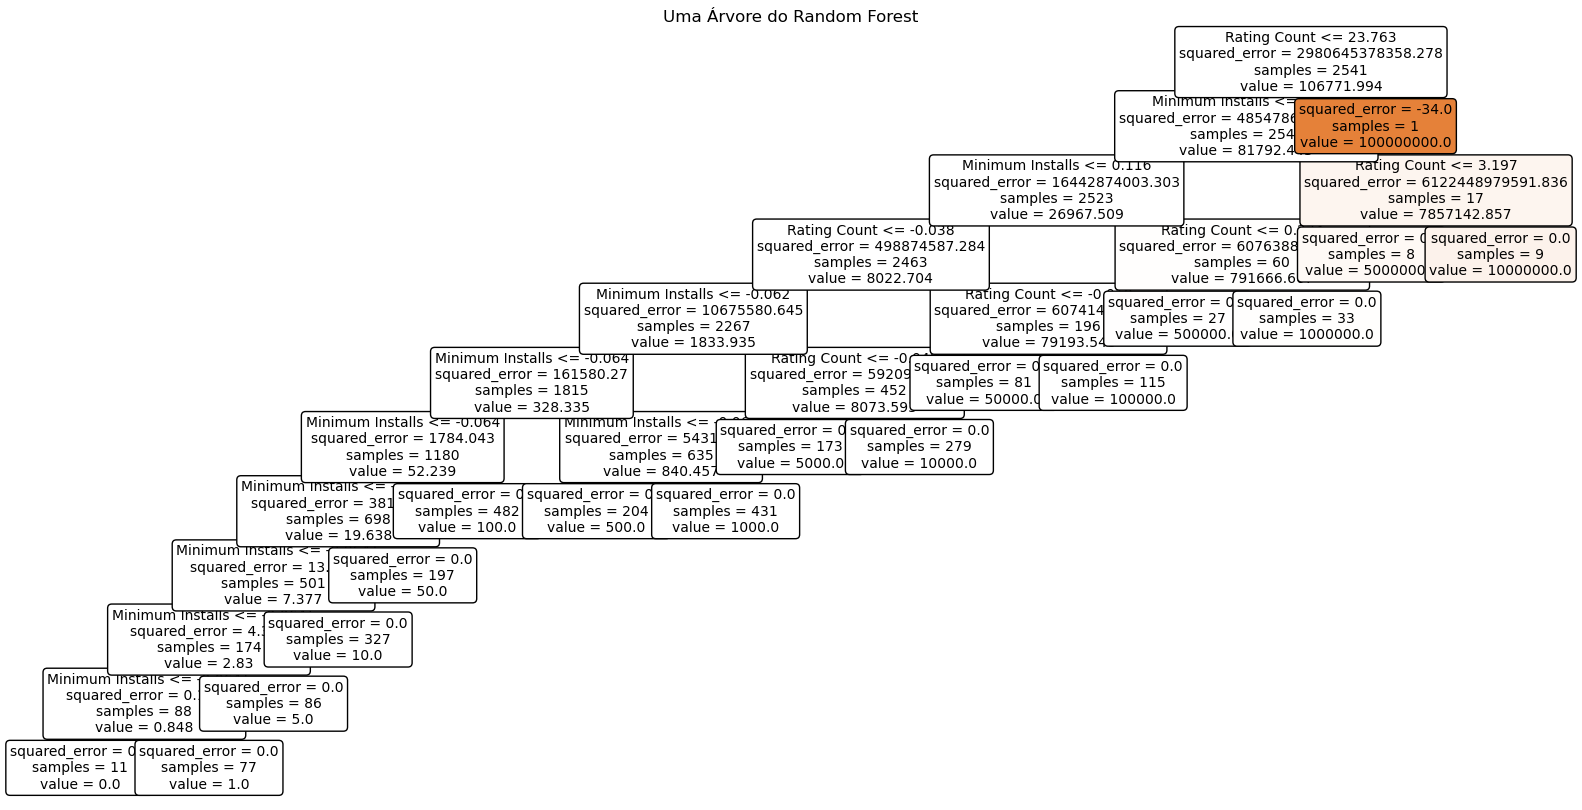

In [13]:
# Extrair o modelo Random Forest treinado do pipeline
random_forest_model = pipeline.named_steps['model']

# Selecionar uma árvore do Random Forest
estimator = random_forest_model.estimators_[0]

# Plotar a árvore do Random Forest
plt.figure(figsize=(20, 10))
plot_tree(estimator, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.title("Uma Árvore do Random Forest")
plt.show()

In [14]:
# Avaliar modelo
pipeline = evaluate_model('Neural Network (single layer)', MLPRegressor(hidden_layer_sizes=(10,), max_iter=1000), X_train, y_train, X_test, y_test)
#Imprimir tamanho do dataframe
print("Tamanho atual do dataframe:", data.shape)

Tipo de 'y' (Installs) antes do treino: Int64
Valores ausentes após imputação (treino) para o modelo Neural Network (single layer):
0    0
dtype: int64
Model: Neural Network (single layer)
R^2: -0.0128
MAE: 79236.5004
MSE: 436425130890.0176
RMSE: 660624.8034

Tamanho atual do dataframe: (5000, 24)


C:\Users\Ivani\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [2]:
# Avaliar modelo
pipeline = evaluate_model('Neural Network (multi layer)', MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000), X_train, y_train, X_test, y_test)
#Imprimir tamanho do dataframe
print("Tamanho atual do dataframe:", data.shape)

Tipo de 'y' (Installs) antes do treino: Int64
Valores ausentes após imputação (treino) para o modelo Neural Network (multi layer):
0    0
dtype: int64
Model: Neural Network (multi layer)
R^2: 0.8470
MAE: 127196.3462
MSE: 65945933087.8552
RMSE: 256799.4024

Tamanho atual do dataframe: (5000, 24)


C:\Users\Ivani\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
